In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from ast import literal_eval

from scipy.stats import bootstrap
import numpy as np

In [2]:
selected_topics_df = pd.read_csv(
    '../out_files/selected_topics_shift_per_period_compass_50iterations.csv',
    converters={'period_pair': literal_eval})
selected_topics_df

,iteration,period_pair,word,semantic_similarity,common_voc_size,neighbors_t1,neighbors_t2
0,0,"(12, 13)",συλλογικη,0.858836,80563,"[('κλαδικη', 0.7225825786590576), ('ατομικη', ...","[('κλαδικη', 0.6316236257553101), ('ατομικη', ..."
1,0,"(11, 12)",φορολογικα,0.882089,80924,"[('προσθετα', 0.6532301902770996), ('τελωνειακ...","[('προσθετα', 0.6811063289642334), ('βαρη', 0...."
2,0,"(10, 11)",εθνικη,0.956287,86396,"[('παλλαικη', 0.4205504059791565), ('ελληνικη'...","[('πολυμελης', 0.5375679135322571), ('παλλαικη..."
3,0,"(8, 9)",αμυνα,0.882250,63542,"[('ασφαλεια', 0.6846429109573364), ('ακεραιοτη...","[('ακεραιοτητα', 0.6850458979606628), ('ασφαλε..."
4,0,"(11, 12)",συλλογικη,0.882529,80924,"[('ατομικη', 0.5900278091430664), ('κλαδικη', ...","[('κλαδικη', 0.6964172124862671), ('αποικιοκρα..."
...,...,...,...,...,...,...,...
48245,49,"(13, 15)",ανωτατη,0.873688,83188,"[('τριτοβαθμια', 0.7540215253829956), ('διαπολ...","[('τριτοβαθμια', 0.7569918632507324), ('μειονο..."
48246,49,"(12, 13)",αμυνα,0.873383,80563,"[('ομοψυχια', 0.5617215633392334), ('πινακοθηκ...","[('ομοψυχια', 0.5596197843551636), ('ακεραιοτη..."
48247,49,"(7, 8)",τουριστικης,0.873335,68800,"[('βιομηχανικης', 0.6592989563941956), ('οικισ...","[('ολοκληρωμενης', 0.7599883675575256), ('οικι..."
48248,49,"(7, 8)",επιδοματων,0.877304,68800,"[('επιδοματος', 0.8182019591331482), ('βοηθημα...","[('επιδοματος', 0.766563892364502), ('αποδοχων..."


In [3]:
def confidence_intervals(data):
    res = bootstrap((data,), np.mean, confidence_level=0.95)
    return (res.confidence_interval.low, res.confidence_interval.high)

In [4]:
selected_topics_df = selected_topics_df[['period_pair', 'word', 'semantic_similarity']].\
    groupby(['period_pair', 'word']).agg(['mean', confidence_intervals]).reset_index()
selected_topics_df.sort_values(by='period_pair', inplace=True)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                               
                         confidence_intervals  
0    (0.8727822571313881, 0.8760216860829853)  
75   (0.8211016452124688, 0.8272028037342248)  
74   (0.8195799474010835, 0.8251412240764382)  
73   (0.8863497365902463, 0.8892714682567738)  
72      (0.81975889599107, 0.825292283241141)  
..                                        ...  
884  (0.7623230469424784, 0.7685520440840051)  
883  (0.8625441140519253, 0.8662020037393449)  
882  (0.9011486501315736, 0.9043033541018245)  
908  (0.6418011494053509, 0.6614406038560817)  
964  (0.8466196879737549, 0.8506543254596322)  

[965 rows x 4 columns]

In [5]:
selected_topics_df[['ci_low', 'ci_high']] = pd.DataFrame(selected_topics_df[('semantic_similarity', 'confidence_intervals')].tolist(), 
                                                         index= selected_topics_df.index)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  
                         confidence_intervals                      
0    (0.8727822571313881, 0.8760216860829853)  0.872782  0.876022  
75   (0.8211016452124688, 0.8272028037342248)  0.821102  0.827203  
74   (0.8195799474010835, 0.8251412240764382)  0.819580  0.825141  
73   (0.8863497365902463, 0.8892714682567738)  0.886350  0.889271  
72      (0.81975889599107, 0.825292283241141)  0.819759  0.825292  
..                                        ...       ...       ...  
884  (0.7623230469424784, 0.7685520440840051)  0.762323  0.768552  
883  (0.8625441140519253, 0.8662020037393449)  0.862544  0.866202  
882  (0.9011486501315736, 0.9043033541018245)  0.901149  0.904303  
908  (0.6418011494053509, 0.6614406038560817)  0.641801  0.661441  
964  (0.8466196879737549, 0.8506543254596322)  0.846620  0.850654  

[965 rows x 6 columns]

In [6]:
selected_topics_df['yerr_low'] = (selected_topics_df[('semantic_similarity', 'mean')] 
                                  - selected_topics_df['ci_low'])
selected_topics_df['yerr_high'] = (selected_topics_df['ci_high'] 
                                   - selected_topics_df[('semantic_similarity', 'mean')])
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0    (0.8727822571313881, 0.8760216860829853)  0.872782  0.876022  0.001543   
75   (0.8211016452124688, 0.8272028037342248)  0.821102  0.827203  0.003107   
74   (0.8195799474010835, 0.8251412240764382)  0.819580  0.825141  0.002770   
73   (0.8863497365902463, 0.8892714682567738)  0.886350  0.889271  0.001460   
72      (0.81975889599107, 0.825292283241141)  0.819759  0.825292  0.002617   
..                                        ...       ...       ...       ...   
884  (0.7623230469424784, 0.7685520440840051)  0.762323  0.768552  0.003178   
883  (0.8625441140519253, 0.8662020037393449)  0.862544  0.866202  0.001828   
882  (0.9011486501315736, 0.9043033541018245)  0.901149  0.904303  0.001590   
908  (0.6418011494053509, 0.6614406038560817)  0.641801  0.661441  0.010411   
964  (0.8466196879737549, 0.8506543254596322)  0.846620  0.850654  0.002110   

    yerr_high  
               
0    0.001696  
75   0.002994  
74   0.002791  
73   0.001462  
72   0.002917  
..        ...  
884  0.003051  
883  0.001830  
882  0.001564  
908  0.009228  
964  0.001925  

[965 rows x 8 columns]

In [7]:
periods = {
    7: (1989, 1993),
    8: (1993, 1996),
    9: (1996, 2000),
    10: (2000, 2004),
    11: (2004, 2007),
    12: (2007, 2009),
    13: (2009, 2012),
    14: (2012, 2012),
    15: (2012, 2014),
    16: (2015, 2015),
    17: (2015, 2019),
    18: (2019, 2020)
}

In [8]:
selected_topics_df['period_start'] = selected_topics_df['period_pair'].map(lambda x: periods[x[0]][0])
selected_topics_df['period_end'] = selected_topics_df['period_pair'].map(lambda x: periods[x[1]][1])
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0    (0.8727822571313881, 0.8760216860829853)  0.872782  0.876022  0.001543   
75   (0.8211016452124688, 0.8272028037342248)  0.821102  0.827203  0.003107   
74   (0.8195799474010835, 0.8251412240764382)  0.819580  0.825141  0.002770   
73   (0.8863497365902463, 0.8892714682567738)  0.886350  0.889271  0.001460   
72      (0.81975889599107, 0.825292283241141)  0.819759  0.825292  0.002617   
..                                        ...       ...       ...       ...   
884  (0.7623230469424784, 0.7685520440840051)  0.762323  0.768552  0.003178   
883  (0.8625441140519253, 0.8662020037393449)  0.862544  0.866202  0.001828   
882  (0.9011486501315736, 0.9043033541018245)  0.901149  0.904303  0.001590   
908  (0.6418011494053509, 0.6614406038560817)  0.641801  0.661441  0.010411   
964  (0.8466196879737549, 0.8506543254596322)  0.846620  0.850654  0.002110   

    yerr_high period_start period_end  
                                       
0    0.001696         1989       1996  
75   0.002994         1989       1996  
74   0.002791         1989       1996  
73   0.001462         1989       1996  
72   0.002917         1989       1996  
..        ...          ...        ...  
884  0.003051         2015       2020  
883  0.001830         2015       2020  
882  0.001564         2015       2020  
908  0.009228         2015       2020  
964  0.001925         2015       2020  

[965 rows x 10 columns]

In [9]:
selected_topics_df['period_middle'] = ((selected_topics_df['period_start'] 
                                        + selected_topics_df['period_end']) / 2)
selected_topics_df

period_pair            word semantic_similarity  \
                                               mean   
0        (7, 8)         αγροτες            0.874325   
75       (7, 8)      πολιτισμος            0.824209   
74       (7, 8)       πολιτισμο            0.822350   
73       (7, 8)      περιβαλλον            0.887809   
72       (7, 8)  πανεπιστημιακο            0.822376   
..          ...             ...                 ...   
884    (17, 18)        γυναικας            0.765501   
883    (17, 18)         γυναικα            0.864372   
882    (17, 18)         βασικος            0.902739   
908    (17, 18)   ημιαπασχοληση            0.652212   
964    (17, 18)             φπα            0.848729   

                                                 ci_low   ci_high  yerr_low  \
                         confidence_intervals                                 
0    (0.8727822571313881, 0.8760216860829853)  0.872782  0.876022  0.001543   
75   (0.8211016452124688, 0.8272028037342248)  0.821102  0.827203  0.003107   
74   (0.8195799474010835, 0.8251412240764382)  0.819580  0.825141  0.002770   
73   (0.8863497365902463, 0.8892714682567738)  0.886350  0.889271  0.001460   
72      (0.81975889599107, 0.825292283241141)  0.819759  0.825292  0.002617   
..                                        ...       ...       ...       ...   
884  (0.7623230469424784, 0.7685520440840051)  0.762323  0.768552  0.003178   
883  (0.8625441140519253, 0.8662020037393449)  0.862544  0.866202  0.001828   
882  (0.9011486501315736, 0.9043033541018245)  0.901149  0.904303  0.001590   
908  (0.6418011494053509, 0.6614406038560817)  0.641801  0.661441  0.010411   
964  (0.8466196879737549, 0.8506543254596322)  0.846620  0.850654  0.002110   

    yerr_high period_start period_end period_middle  
                                                     
0    0.001696         1989       1996        1992.5  
75   0.002994         1989       1996        1992.5  
74   0.002791         1989       1996        1992.5  
73   0.001462         1989       1996        1992.5  
72   0.002917         1989       1996        1992.5  
..        ...          ...        ...           ...  
884  0.003051         2015       2020        2017.5  
883  0.001830         2015       2020        2017.5  
882  0.001564         2015       2020        2017.5  
908  0.009228         2015       2020        2017.5  
964  0.001925         2015       2020        2017.5  

[965 rows x 11 columns]

In [10]:
selected_topics_df[(selected_topics_df['word'] == 'ομοφυλα')]['semantic_similarity']['mean']

597    0.650990
708    0.663927
819    0.825442
930    0.805897
Name: mean, dtype: float64

In [11]:
word_period_df = selected_topics_df.groupby(['word', 'period_pair']).agg('first')
word_period_df

/home/dina/Documents/repos/paper_greekparliament/.parl_env/lib/python3.7/site-packages/pandas/core/generic.py:4147: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


semantic_similarity  \
                                 mean   
word  period_pair                       
brain (12, 13)               0.703587   
      (13, 15)               0.702042   
      (15, 17)               0.886206   
      (17, 18)               0.946961   
drain (12, 13)               0.729124   
...                               ...   
φπα   (11, 12)               0.840230   
      (12, 13)               0.814251   
      (13, 15)               0.912290   
      (15, 17)               0.855084   
      (17, 18)               0.848729   

                                                               ci_low  \
                                       confidence_intervals             
word  period_pair                                                       
brain (12, 13)     (0.6927200269530889, 0.7136475682629115)  0.692720   
      (13, 15)      (0.695034422870932, 0.7087670689147578)  0.695034   
      (15, 17)     (0.8838589726386936, 0.8883834588861541)  0.883859   
      (17, 18)     (0.9460425478630635, 0.9478353029722044)  0.946043   
drain (12, 13)     (0.7182561302786538, 0.7391192749861226)  0.718256   
...                                                     ...       ...   
φπα   (11, 12)     (0.8377169183980601, 0.8423997737175254)  0.837717   
      (12, 13)      (0.812153044494796, 0.8163928827451893)  0.812153   
      (13, 15)     (0.9112013462491807, 0.9132695043160278)  0.911201   
      (15, 17)      (0.8532322182819019, 0.856680533950712)  0.853232   
      (17, 18)     (0.8466196879737549, 0.8506543254596322)  0.846620   

                    ci_high  yerr_low yerr_high period_start period_end  \
                                                                          
word  period_pair                                                         
brain (12, 13)     0.713648  0.010867  0.010061         2007       2012   
      (13, 15)     0.708767  0.007007  0.006726         2009       2014   
      (15, 17)     0.888383  0.002347  0.002177         2012       2019   
      (17, 18)     0.947835  0.000919  0.000874         2015       2020   
drain (12, 13)     0.739119  0.010868  0.009995         2007       2012   
...                     ...       ...       ...          ...        ...   
φπα   (11, 12)     0.842400  0.002513  0.002170         2004       2009   
      (12, 13)     0.816393  0.002098  0.002142         2007       2012   
      (13, 15)     0.913270  0.001088  0.000980         2009       2014   
      (15, 17)     0.856681  0.001852  0.001596         2012       2019   
      (17, 18)     0.850654  0.002110  0.001925         2015       2020   

                  period_middle  
                                 
word  period_pair                
brain (12, 13)           2009.5  
      (13, 15)           2011.5  
      (15, 17)           2015.5  
      (17, 18)           2017.5  
drain (12, 13)           2009.5  
...                         ...  
φπα   (11, 12)           2006.5  
      (12, 13)           2009.5  
      (13, 15)           2011.5  
      (15, 17)           2015.5  
      (17, 18)           2017.5  

[965 rows x 9 columns]

In [12]:
word_period_df[('semantic_similarity')]

mean                      confidence_intervals
word  period_pair                                                    
brain (12, 13)     0.703587  (0.6927200269530889, 0.7136475682629115)
      (13, 15)     0.702042   (0.695034422870932, 0.7087670689147578)
      (15, 17)     0.886206  (0.8838589726386936, 0.8883834588861541)
      (17, 18)     0.946961  (0.9460425478630635, 0.9478353029722044)
drain (12, 13)     0.729124  (0.7182561302786538, 0.7391192749861226)
...                     ...                                       ...
φπα   (11, 12)     0.840230  (0.8377169183980601, 0.8423997737175254)
      (12, 13)     0.814251   (0.812153044494796, 0.8163928827451893)
      (13, 15)     0.912290  (0.9112013462491807, 0.9132695043160278)
      (15, 17)     0.855084   (0.8532322182819019, 0.856680533950712)
      (17, 18)     0.848729  (0.8466196879737549, 0.8506543254596322)

[965 rows x 2 columns]

In [13]:
topics_to_show = word_period_df[word_period_df[('semantic_similarity', 'mean')] <= 0.651].\
    reset_index()['word'].unique()

In [14]:
topics_to_skip = set([
    'ανδρα', 'αντρα', 'αντρας', #keep ανδρας
    'ασυλου',
    'θρησκευτικων', 'θρησκειας', 'θρησκευτικα', 'θρησκευτικο',# keep θρησκειa
    'κοκ',
    'οαεδ',
    'οσε',
    'υιοθεσιας', #keep υιοθεσια
    'προσχολικη',
    'κοκ',
    'οσε',
    'αθλητισμος',
    'αθλητισμου',
    'υδροδοτηση',
    'αλιεια',
    'εργασιακα',
    'εκκλησιας', 'εκκλησια',
    'γυναικας',
    'μεταναστευτικο'
])

topics_to_show = [ t for t in topics_to_show if t not in topics_to_skip]
topics_to_show.append('γυναικα')

topics_to_show

['ανδρας',
 'ασυλο',
 'ημιαπασχοληση',
 'θρησκεια',
 'μακεδονικο',
 'ομοφυλα',
 'ομοφυλοφιλοι',
 'προσφυγικο',
 'υιοθεσια',
 'γυναικα']

In [15]:
period_combos = {
    7: (5, 6, 7),
    8: (8,),
    9: (9,),
    10: (10,),
    11: (11,),
    12: (12,),
    13: (13,),
    14: (14, 15),
    15: (14, 15),
    16: (16, 17),
    17: (16, 17),
    18: (18,)
}

In [16]:
def period_ticklabel(period_pair):
    start, end = period_pair
    start_str = '-'.join([str(x) for x in period_combos[start]])
    end_str = '-'.join([str(x) for x in period_combos[end]])
    return f'{start_str} ({periods[start][0]}-{periods[start][1]}) &\n {end_str} ({periods[end][0]}-{periods[end][1]})'

period_ticklabel((7, 8))

'5-6-7 (1989-1993) &\n 8 (1993-1996)'

In [17]:
topics = [
    'αγροτικη', 'αγροτικα', 'αγροτες', 
    'αναπτυξη', 'επενδυσεις', 'επενδυσεων',
    'ασφαλιστικο', 'εργασια', 'εργασιακα', 
    'δικαιωματα', 'συμβαση', 'συλλογικη', 
    'μισθος', 'βασικος', 'ημιαπασχοληση', 
    'brain', 'drain', 'οαεδ',
    'δικαιοσυνη', 'διαφανεια', 'υιοθεσια', 
    'υιοθεσιας', 'εθνικη', 'αμυνα', 
    'ενοπλες', 'εξωτερικη', 'διεθνεις',
    'ναυτιλια','νησια','υδροδοτηση',
    'αλιεια', 'οικονομια', 'αφορολογητο', 
    'αποκεντρωση', 'φπα', 'επιχειρησεις', 
    'φορολογικα', 'φορολογια', 'παιδεια', 
    'ερευνα', 'προσχολικη', 'ασυλο', 
    'ασυλου', 'πανεπιστημιακο', 'δευτεροβαθμια', 
    'πρωτοβαθμια', 'ανωτατη', 'δημοσια', 
    'ιδιωτικη', 'σχολες', 'περιβαλλον', 
    'ενεργεια', 'συστημα', 'πολιτισμος', 
    'αθλητισμος', 'πολιτισμο', 'αθλητισμου', 
    'προστασια', 'αστυνομια', 'κοκ', 
    'αστυνομικη', 'αστυνομικοι', 'αστυνομικων',
    'προσφυγικο', 'μεταναστευτικο', 'προσφυγες', 
    'μεταναστες', 'τουρισμος', 'τουριστικης', 
    'τουρισμου', 'τουρισμο', 'υγεια', 
    'προνοια', 'επιδοματα', 'επιδομα', 
    'επιδοματων', 'υποδομες', 'μεταφορες', 
    'αναπλαση', 'μμμ', 'μειωση', 
    'αυξηση', 'συνταξη', 'μακεδονικο', 
    'μακεδονιας', 'μακεδονια', 'προσληψεις', 
    'απολυσεις', 'εκας', 'οσε', 
    'συγκοινωνιες', 'νομοσχεδιο', 'θρησκεια', 
    'θρησκειας', 'θρησκευτικο', 'θρησκευτικου',
    'θρησκευτικων', 'γυναικα', 'γυναικας', 
    'ανδρας',  'ανδρα', 'αντρας', 
    'αντρα', 'ομοφυλα', 'ομοφυλοφιλοι', 
    'ομοφιλοφιλων', 'εοπυυ', 'τουρκια', 
    'τουρκιας', 'εκκλησιας', 'εκκλησια', 
    'κριση', 'κρισης', 'αυθαιρεσια'
]

In [18]:
topics = {
    'αγροτικη': 'agricultural', 'αγροτικα': 'agricultural', 'αγροτες': 'farmers',
    'αναπτυξη': 'growth', 'επενδυσεις': 'investements', 'επενδυσεων': 'investements',
    'ασφαλιστικο': 'insurance', 'εργασια': 'labor', 'εργασιακα': 'labor', 
    'δικαιωματα': 'rights', 'συμβαση': 'contract', 'συλλογικη': 'collective',
    'μισθος': 'salary', 'βασικος': 'minimum', 'ημιαπασχοληση': 'part-time', 
    'brain': 'brain', 'drain': 'drain', 'οαεδ': 'OAED',
    'δικαιοσυνη': 'justice', 'διαφανεια': 'transparency', 'υιοθεσια': 'adoption', 
    'υιοθεσιας': 'adoption', 'εθνικη': 'national', 'αμυνα': 'defence', 
    'ενοπλες': 'armed', 'εξωτερικη': 'foreign', 'διεθνεις': 'international',
    'ναυτιλια': 'shipping', 'νησια': 'islands', 'υδροδοτηση': 'water_supply', 
    'αλιεια': 'fishing', 'οικονομια': 'economy', 'αφορολογητο': 'tax-exempt',
    'αποκεντρωση': 'decentralization', 'φπα': 'VAT', 'επιχειρησεις': 'businesses', 
    'φορολογικα': 'tax', 'φορολογια': 'taxation', 'παιδεια': 'education', 
    'ερευνα': 'research', 'προσχολικη': 'preschool', 'ασυλο': 'asylum', 
    'ασυλου': 'asylum', 'πανεπιστημιακο': 'university', 'δευτεροβαθμια': 'secondary',
    'πρωτοβαθμια': 'primary', 'ανωτατη': 'higher', 'δημοσια': 'public', 
    'ιδιωτικη': 'private', 'σχολες': 'schools/faculties', 'περιβαλλον': 'environment', 
    'ενεργεια': 'energy', 'συστημα': 'system', 'πολιτισμος': 'culture', 
    'αθλητισμος': 'sports', 'πολιτισμο': 'culture', 'αθλητισμου': 'sports',
    'προστασια': 'protection', 'αστυνομια': 'police', 'κοκ': 'traffic_code', 
    'αστυνομικη': 'police', 'αστυνομικοι': 'police', 'αστυνομικων': 'police',
    'προσφυγικο': 'refugee', 'μεταναστευτικο': 'migratory', 'προσφυγες': 'refugees', 
    'μεταναστες': 'immigrants', 'τουρισμος': 'tourism', 'τουριστικης': 'tourism',
    'τουρισμου': 'tourism', 'τουρισμο': 'tourism', 'υγεια': 'heatlh', 
    'προνοια': 'welfare', 'επιδοματα': 'subsidies', 'επιδομα': 'subsidy', 
    'επιδοματων': 'subsidies', 'υποδομες': 'infrastructure', 'μεταφορες': 'transportation',
    'αναπλαση': 'remodeling', 'μμμ': 'public_transport ', 'μειωση': 'reduction', 
    'αυξηση': 'raise', 'συνταξη': 'retirement', 'μακεδονια': 'macedonia', 
    'μακεδονιας': 'macedonia', 'μακεδονικο': 'macedonian', 'προσληψεις': 'hirings',
    'απολυσεις': 'redundancies', 'εκας': 'EKAS', 'οσε': 'OSE',
    'συγκοινωνιες': 'transportation', 'νομοσχεδιο': 'bill', 'θρησκεια': 'religion', 
    'θρησκειας': 'religion', 'θρησκευτικο': 'religious', 'θρησκευτικου': 'religious',
    'θρησκευτικων': 'religious', 'γυναικα': 'woman', 'γυναικας': 'woman', 
    'ανδρας': 'man', 'αντρας': 'man', 'αντρα': 'man', 
    'ανδρα': 'man', 'ομοφυλα': 'same-sex', 'ομοφυλοφιλοι': 'homosexuals', 
    'ομοφιλοφιλων': 'homosexuals', 'εοπυυ': 'EOPPY', 'τουρκια': 'Turkey', 
    'τουρκιας': 'Turkey', 'εκκλησιας': 'church', 'εκκλησια': 'church', 
    'κριση': 'crisis', 'κρισης': 'crisis', 'αυθαιρεσια': 'arbitrariness'
}

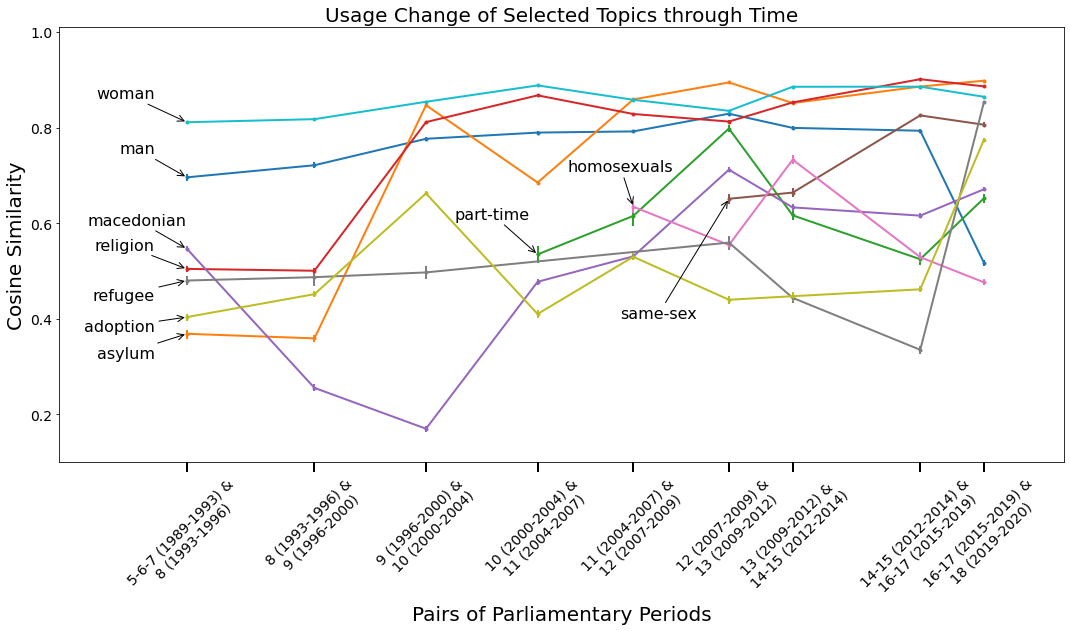

In [19]:
fig = plt.figure(figsize=(18, 8))


xytext_offsets = {
    'asylum': (-1, -0.05),
    'macedonian': (0, 0.05),
    'part-time': (-0.25, 0.075), 
    'woman': (-1, 0.05),
    'homosexuals': (1.25, 0.075),
    'refugee': (-1, -0.04),
    'religion': (-1, 0.04),
    'man': (-1, 0.05),
    'same-sex': (-1, -0.25),
    'adoption': (-1, -0.03)
}

for ti, topic in enumerate(topics_to_show):
    selected_topic_df = selected_topics_df[selected_topics_df['word'] == topic]
    #print(selected_topic_df)
    yerr = [
        selected_topic_df['yerr_low'],
        selected_topic_df['yerr_high']
    ]
    
    average_similarity = selected_topic_df[('semantic_similarity', 'mean')]
    x = selected_topic_df['period_middle'].iloc[0]
    y = average_similarity.iloc[0]
    plt.errorbar(x=selected_topic_df['period_middle'], 
                 y=average_similarity, 
                 yerr=yerr, 
                 label=topic, 
                 linewidth=2, markersize=3, fmt='-o')
    plt.annotate(topics[topic], 
                 xy=(x, y), 
                 xytext=(x+xytext_offsets[topics[topic]][0], y+xytext_offsets[topics[topic]][1]),
                 fontsize=16,
                 ha='right',
                 arrowprops=dict(arrowstyle='->'))

plt.xlim((1988.5, 2020))
plt.ylim((0.1, 1.01))

xticks = selected_topic_df['period_middle'].unique()
xtick_labels = [ period_ticklabel(x) for x in sorted(selected_topic_df['period_pair'].unique()) ]
plt.xticks(xticks, xtick_labels, rotation=45, fontsize=14)
plt.tick_params(axis='x', direction='out', which='major', length=10, width=2)
plt.yticks(fontsize=14)


plt.ylabel('Cosine Similarity', fontsize=20)
plt.xlabel('Pairs of Parliamentary Periods', fontsize=20)
_ = plt.title('Usage Change of Selected Topics through Time', fontsize=20)
plt.savefig('../out_files/usage_change_of_selected_topics_through_time_with_errorbars.png', dpi=300,  
            bbox_inches='tight')